# Imports

In [6]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

# Configs

In [7]:
train_data_root = 'C:\\Users\\MLR\\data'
test_data_root = 'C:\\Users\\MLR\\data'
#train_data_root = '/mnt/data/mlr_ahj_datasets/mnist/packed/train'
#test_data_root = '/mnt/data/mlr_ahj_datasets/mnist/packed/test'

# Load

In [8]:
train_data = idx2numpy.convert_from_file(os.path.join(train_data_root, 'train-images-idx3-ubyte'))
train_targets = idx2numpy.convert_from_file(os.path.join(train_data_root, 'train-labels-idx1-ubyte'))

test_data = idx2numpy.convert_from_file(os.path.join(test_data_root, 't10k-images-idx3-ubyte'))
test_targets = idx2numpy.convert_from_file(os.path.join(test_data_root, 't10k-labels-idx1-ubyte'))

df_train = pd.DataFrame(train_targets)
df_test = pd.DataFrame(test_targets)

# Analysis

## General

In [9]:
df_train.describe()

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [10]:
df_train[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [11]:
df_train.isnull().sum()

0    0
dtype: int64

## Visualization

### Label distribution

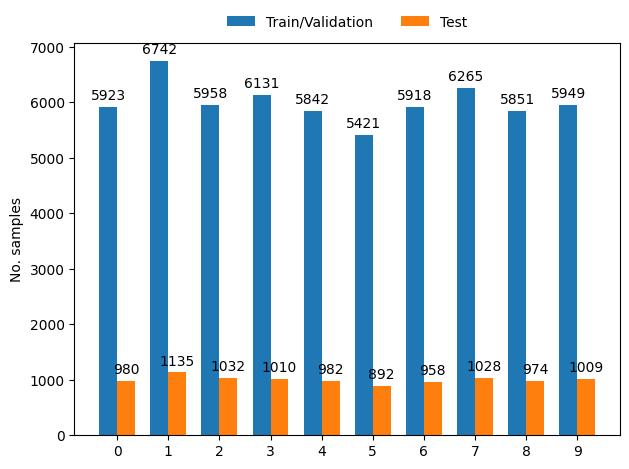

In [50]:
labels = range(0, 10)
 
a_heights, _ = np.histogram(df_train[0], bins=10, )
b_heights, _ = np.histogram(df_test[0], bins=10)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, a_heights, width, label='Train/Validation')
rects2 = ax.bar(x + width/2, b_heights, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. samples')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
plt.tight_layout()
plt.show()

## Train/validation - Test proportions

Text(20.847222222222214, 0.5, 'No. samples')

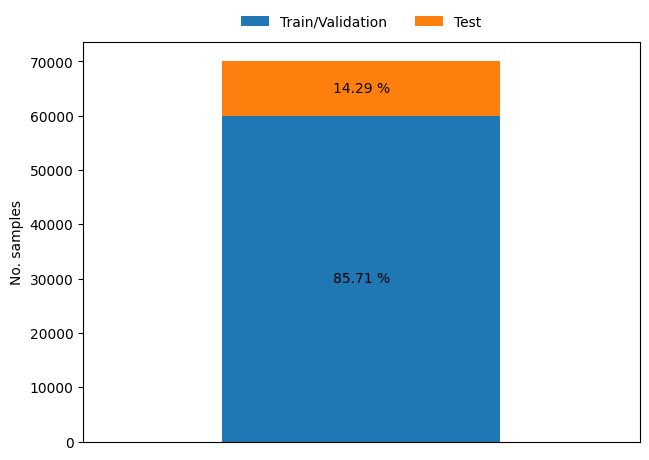

In [47]:
df = pd.DataFrame({'Train/Validation' : [len(train_data)] ,
                   'Test' : [len(test_data)]})
df.plot.bar(stacked=True)



for ix, row in df.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{round(element/70000 * 100, 2)} %",
                    va="center",
                    ha="center",
                )
                cumulative += element
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )

plt.tight_layout()
plt.xticks([])
plt.ylabel("No. samples")

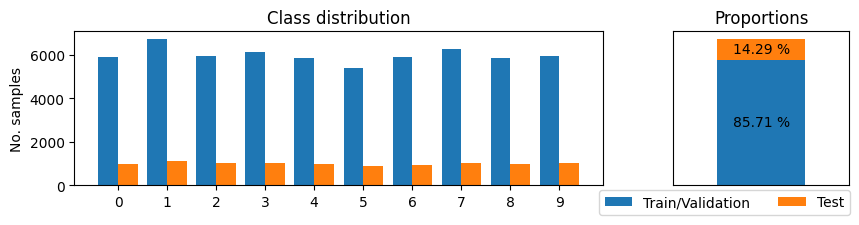

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(10,2))
df = pd.DataFrame({'Train/Validation' : [len(train_data)] ,
                   'Test' : [len(test_data)]})
df.plot.bar(stacked=True, ax=ax2, legend=None)

for ix, row in df.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{round(element/70000 * 100, 2)} %",
                    va="center",
                    ha="center",
                )
                cumulative += element

plt.xticks([])
plt.yticks([])
ax2.set_title("Proportions")

#
labels = range(0, 10)

a_heights, _ = np.histogram(df_train[0], bins=10, )
b_heights, _ = np.histogram(df_test[0], bins=10)

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects1 = ax1.bar(x - width/2, a_heights, width, label='Train/Validation')
rects2 = ax1.bar(x + width/2, b_heights, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('No. samples')
ax1.set_xticks(x, labels)

ax1.legend(["Train/Validation", 'Test'], loc='right', bbox_to_anchor=(0.9075,0.025), ncol=len(labels), bbox_transform=fig.transFigure)
ax1.set_title("Class distribution")
plt.show()
fig.savefig("images/mnist_proportions.png", bbox_inches='tight', pad_inches=0)